<a href="https://colab.research.google.com/github/Mayday8080/insurance-fraud/blob/main/project_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")



import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


In [ ]:
insurance_claim=pd.read_csv("insurance_claims.csv")
insurance_claim.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,1,?,0,0,?,5070,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,1,?,1,2,NO,63400,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [ ]:
insurance_claim.describe()


,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
count,699.000000,699.000000,699.000000,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,202.711016,1160.228898,1254.135351,1.174535e+06,23937.339056,-27477.968526,1.832618,1.008584,1.457797,52978.040057,7404.806867,7527.138770,38046.094421
std,115.868612,617.966862,243.961452,2.364587e+06,27646.052259,28110.144105,1.013813,0.811759,1.094074,26837.620428,4916.059766,4980.192065,19088.431533
min,0.000000,500.000000,433.330000,-1.000000e+06,0.000000,-93600.000000,1.000000,0.000000,0.000000,2160.000000,0.000000,0.000000,1440.000000
25%,111.000000,500.000000,1085.620000,0.000000e+00,0.000000,-53050.000000,1.000000,0.000000,0.000000,41695.000000,4220.000000,4425.000000,30500.000000
50%,200.000000,1000.000000,1255.680000,0.000000e+00,0.000000,-27900.000000,1.000000,1.000000,1.000000,59040.000000,6780.000000,6720.000000,42800.000000
75%,278.500000,2000.000000,1413.940000,0.000000e+00,49450.000000,0.000000,3.000000,2.000000,2.000000,71360.000000,11330.000000,11360.000000,51035.000000
max,479.000000,2000.000000,2047.590000,1.000000e+07,98800.000000,0.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000


In [ ]:
### First of all we fill "?" with np.Nan

insurance_claim=insurance_claim.replace("?",np.NaN)


In [ ]:
### Checking shape of dataset again

insurance_claim.shape

(699, 27)

In [ ]:
insurance_claim['collision_type']=insurance_claim['collision_type'].fillna(insurance_claim['collision_type'].mode()[0])

In [ ]:
insurance_claim['property_damage']=insurance_claim['property_damage'].fillna("NO")

In [ ]:
insurance_claim['police_report_available']=insurance_claim['property_damage'].fillna("NO")

In [ ]:
### Dropping those column which are not much significance in our analysis

insurance_claim.drop(["incident_hour_of_the_day",'insured_zip','policy_bind_date','incident_location'],axis=1,inplace=True)

KeyError: ignored

In [ ]:
### Datasplitting into fraud and not fraud category

insurance_claim_f=insurance_claim[insurance_claim['fraud_reported']=='Y']
insurance_claim_nf=insurance_claim[insurance_claim['fraud_reported']=='N']

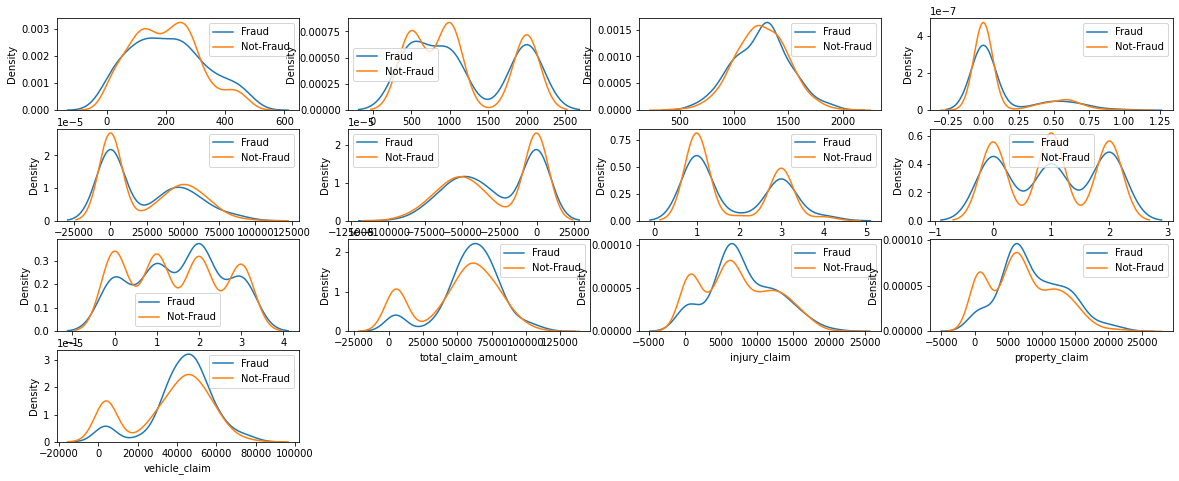

In [ ]:
plt.figure(figsize=[20,20])
num_col=insurance_claim.describe().columns.to_list()

c=1

for i in num_col:
    plt.subplot(10, 4, c)
    sns.distplot(insurance_claim_f[i],hist=False,label='Fraud')
    sns.distplot(insurance_claim_nf[i],hist=False,label='Not-Fraud')
    c = c + 1
    plt.legend()    
plt.show()

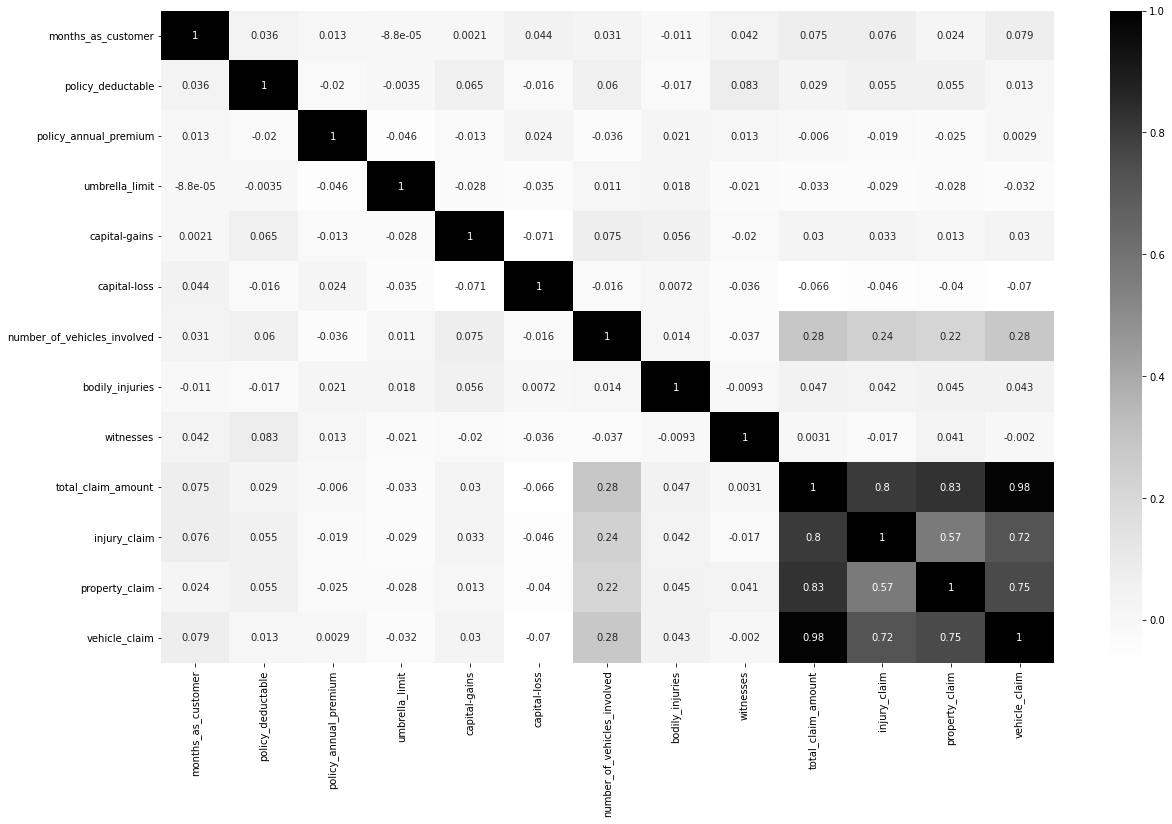

In [ ]:
plt.figure(figsize=[20,12])
sns.heatmap(insurance_claim.corr(),annot=True,cmap="Greys")
plt.show()


In [ ]:
### Intialize "count" column

insurance_claim['count']=1

groupdf_is=insurance_claim.groupby(by=['insured_sex','fraud_reported']).count()
groupdf_is.reset_index(inplace=True)
groupdf_is=groupdf_is[['insured_sex','fraud_reported','count']]

groupdf_is

,insured_sex,fraud_reported,count
0,FEMALE,N,277
1,FEMALE,Y,89
2,MALE,N,248
3,MALE,Y,85


In [ ]:
groupdf_uu=insurance_claim.groupby(by=['umbrella_limit','fraud_reported']).count()
groupdf_uu.reset_index(inplace=True)
groupdf_uu=groupdf_uu[['umbrella_limit','fraud_reported','count']]
groupdf_uu

,umbrella_limit,fraud_reported,count
0,-1000000,N,1
1,0,N,415
2,0,Y,134
3,2000000,N,1
4,2000000,Y,2
5,3000000,N,6
6,3000000,Y,2
7,4000000,N,20
8,4000000,Y,7
9,5000000,N,23


In [ ]:
groupdf_el=insurance_claim.groupby(by=['insured_education_level','fraud_reported']).count()
groupdf_el.reset_index(inplace=True)
groupdf_el=groupdf_el[['insured_education_level','fraud_reported','count']]
groupdf_el

,insured_education_level,fraud_reported,count
0,Associate,N,79
1,Associate,Y,22
2,College,N,65
3,College,Y,22
4,High School,N,89
5,High School,Y,27
6,JD,N,77
7,JD,Y,32
8,MD,N,67
9,MD,Y,27


In [ ]:
groupdf_ic=insurance_claim.groupby(by=['insured_occupation','fraud_reported']).count()
groupdf_ic.reset_index(inplace=True)
groupdf_ic=groupdf_ic[['insured_occupation','fraud_reported','count']]
groupdf_ic

,insured_occupation,fraud_reported,count
0,adm-clerical,N,38
1,adm-clerical,Y,7
2,armed-forces,N,34
3,armed-forces,Y,14
4,craft-repair,N,32
5,craft-repair,Y,18
6,exec-managerial,N,34
7,exec-managerial,Y,20
8,farming-fishing,N,32
9,farming-fishing,Y,10


In [ ]:
groupdf_rl=insurance_claim.groupby(by=['insured_relationship','fraud_reported']).count()
groupdf_rl.reset_index(inplace=True)
groupdf_rl=groupdf_rl[['insured_relationship','fraud_reported','count']]
groupdf_rl

,insured_relationship,fraud_reported,count
0,husband,N,86
1,husband,Y,22
2,not-in-family,N,90
3,not-in-family,Y,34
4,other-relative,N,90
5,other-relative,Y,40
6,own-child,N,99
7,own-child,Y,24
8,unmarried,N,78
9,unmarried,Y,25


In [ ]:
age_groups=pd.cut(insurance_claim['age'], bins=[18,27,36,45,54,np.inf])
groupdf_age = pd.crosstab(age_groups,insurance_claim['fraud_reported'])
groupdf_age

KeyError: ignored

In [ ]:
amt_groups=pd.cut(insurance_claim['total_claim_amount'], bins=[0,25000,50000,75000,100000,np.inf])
groupdf_amt = pd.crosstab(amt_groups,insurance_claim['fraud_reported'])
groupdf_amt

fraud_reported,N,Y
total_claim_amount,,
"(0.0, 25000.0]",117,15
"(25000.0, 50000.0]",81,24
"(50000.0, 75000.0]",221,99
"(75000.0, 100000.0]",99,33
"(100000.0, inf]",7,3


In [ ]:
groupdf_it=insurance_claim.groupby(by=['incident_type','fraud_reported']).count()
groupdf_it.reset_index(inplace=True)
groupdf_it=groupdf_it[['incident_type','fraud_reported','count']]
groupdf_it

,incident_type,fraud_reported,count
0,Multi-vehicle Collision,N,216
1,Multi-vehicle Collision,Y,77
2,Parked Car,N,54
3,Parked Car,Y,8
4,Single Vehicle Collision,N,195
5,Single Vehicle Collision,Y,83
6,Vehicle Theft,N,60
7,Vehicle Theft,Y,6


In [ ]:
groupdf_ct=insurance_claim.groupby(by=['collision_type','fraud_reported']).count()
groupdf_ct.reset_index(inplace=True)
groupdf_ct=groupdf_ct[['collision_type','fraud_reported','count']]
groupdf_ct

,collision_type,fraud_reported,count
0,Front Collision,N,132
1,Front Collision,Y,51
2,Rear Collision,N,253
3,Rear Collision,Y,74
4,Side Collision,N,140
5,Side Collision,Y,49


In [ ]:
groupdf_ins=insurance_claim.groupby(by=['incident_severity','fraud_reported']).count()
groupdf_ins.reset_index(inplace=True)
groupdf_ins=groupdf_ins[['incident_severity','fraud_reported','count']]
groupdf_ins

,incident_severity,fraud_reported,count
0,Major Damage,N,83
1,Major Damage,Y,113
2,Minor Damage,N,213
3,Minor Damage,Y,28
4,Total Loss,N,164
5,Total Loss,Y,28
6,Trivial Damage,N,65
7,Trivial Damage,Y,5


In [ ]:
groupdf_ac=insurance_claim.groupby(by=['authorities_contacted','fraud_reported']).count()
groupdf_ac.reset_index(inplace=True)
groupdf_ac=groupdf_ac[['authorities_contacted','fraud_reported','count']]
groupdf_ac

,authorities_contacted,fraud_reported,count
0,Ambulance,N,105
1,Ambulance,Y,36
2,Fire,N,101
3,Fire,Y,41
4,None,N,56
5,None,Y,5
6,Other,N,95
7,Other,Y,46
8,Police,N,168
9,Police,Y,46


In [ ]:
groupdf_pd=insurance_claim.groupby(by=['property_damage','fraud_reported']).count()
groupdf_pd.reset_index(inplace=True)
groupdf_pd=groupdf_pd[['property_damage','fraud_reported','count']]
groupdf_pd.head()

,property_damage,fraud_reported,count
0,NO,N,372
1,NO,Y,126
2,YES,N,153
3,YES,Y,48


In [ ]:
groupdf_w=insurance_claim.groupby(by=['witnesses','fraud_reported']).count()
groupdf_w.reset_index(inplace=True)
groupdf_w=groupdf_w[['witnesses','fraud_reported','count']]
groupdf_w

,witnesses,fraud_reported,count
0,0,N,141
1,0,Y,36
2,1,N,135
3,1,Y,44
4,2,N,131
5,2,Y,58
6,3,N,118
7,3,Y,36


In [ ]:
groupdf_am=insurance_claim.groupby(by=['auto_make','fraud_reported']).count()
groupdf_am.reset_index(inplace=True)
groupdf_am=groupdf_am[['auto_make','fraud_reported','count']]
groupdf_am

KeyError: ignored

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
X, Y = make_classification(n_samples=len(insurance_claim), n_features=2, n_informative=2, n_redundant=0)

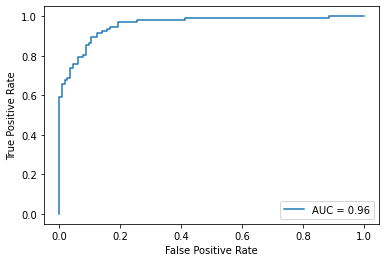

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

y_pred = gnb.predict(X_test)
Y_gnb_score = gnb.predict_proba(X_test)

fpr_gnb, tpr_gnb, thresholds_gnb = metrics.roc_curve(Y_test, Y_gnb_score[:, 1])

roc_auc = metrics.auc(fpr_gnb, tpr_gnb)

display = metrics.RocCurveDisplay(fpr=fpr_gnb, tpr=tpr_gnb, roc_auc = roc_auc)

display.plot()
plt.show() 


In [ ]:
cm = confusion_matrix(Y_test,y_pred)
cm

array([[103,  11],
       [ 13,  83]])

In [ ]:
auc = gnb.score(X_test, Y_test)
auc

0.8857142857142857

In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       114
           1       0.88      0.86      0.87        96

    accuracy                           0.89       210
   macro avg       0.89      0.88      0.88       210
weighted avg       0.89      0.89      0.89       210



In [ ]:
!git add *

fatal: not a git repository (or any of the parent directories): .git
